# WeatherPy
----

### Analysis
* Northern vs. Southern Hemispheres: One might expect temperatures to decline predictably with distance from the equator, however it seems that the northern hemisphere has more extremes, at least at this time of year.  The first graph, which is based on maximum temperatures, indicates that the northern half of the planet gets colder quicker. It also seems that a greater number of cities are in humid, windy and cloudy conditions than the southern hemisphere. This could be because of earth's tilt, however more analysis is needed to be sure.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [3]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "imperial"
#api_key = api_keys.api_key  #from api.py


# Build partial query URL

#query_url = f"{url}appid={api_key}&units={units}&q="
#query_url

#'734101d89b01c4203d11bb03f1960e5d'

In [4]:
cities_df = pd.DataFrame(cities)

cities_df.head()

,0
0,xuddur
1,ahipara
2,maghama
3,albany
4,porto novo


In [5]:
cities_df.columns = ["City"]
cities_df.head()

,City
0,xuddur
1,ahipara
2,maghama
3,albany
4,porto novo


In [6]:
cities_df["Country"] = ""
cities_df["City ID"] = ""
cities_df['Latitude'] = ""
cities_df['Longitude'] = ""
cities_df['Temperature (F)'] = ""
cities_df['Humidity (%)'] = ""
cities_df['Cloudiness (%)'] = ""
cities_df['Wind Speed (mph)'] = ""

In [7]:
cities_df.head()

,City,Country,City ID,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,xuddur,,,,,,,,
1,ahipara,,,,,,,,
2,maghama,,,,,,,,
3,albany,,,,,,,,
4,porto novo,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed '(with the city number and city name).


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key = api_keys.api_key


# Build partial query URL
#{url}appid={api_key}&units={units}&q=
query_url = f"{url}&units={units}&APPID={api_key}&q="
query_url



'http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q='

In [9]:
print(f"Beginning Data Retrieval")
print(f"-------------------------------")



record = 1

for index, row in cities_df.iterrows():
    print(row['City'])
    try:


        cities_url = query_url + row["City"]
        cities_response = requests.get(cities_url).json()



        #city.append(response["name"])
        row["Country"] = cities_response["sys"]["country"]
        row["City ID"] = cities_response["sys"]["id"]
        row["Latitude"] = cities_response["coord"]["lat"]
        row["Longitude"] = cities_response["coord"]["lon"]
        row['Temperature (F)'] = cities_response["main"]["temp_max"]
        row['Humidity (%)'] = cities_response["main"]["humidity"]
        row['Cloudiness (%)'] = cities_response["clouds"]["all"]
        row['Wind Speed (mph)'] = cities_response["wind"]["speed"]




        record += 1 



        #print(city+"&id="+str(cities_url))
        print(cities_url)


    except:
        print(f"Data is missing, skipping")
        continue
            

Beginning Data Retrieval
-------------------------------
xuddur
Data is missing, skipping
ahipara
Data is missing, skipping
maghama
Data is missing, skipping
albany
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=albany
porto novo
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=porto novo
martinsville
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=martinsville
saint george
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=saint george
lagoa
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=lagoa
sorland
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=sorland
vaini
Data is missing, skipping
port blair
Data is missing, skipping
tartus
Data is missing, skipping


http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=vila
paita
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=paita
dingle
Data is missing, skipping
barrow
Data is missing, skipping
axim
Data is missing, skipping
bluff
Data is missing, skipping
upernavik
Data is missing, skipping
torbay
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=torbay
angoram
Data is missing, skipping
cayenne
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=cayenne
listvyagi
Data is missing, skipping
baruun-urt
Data is missing, skipping
vila franca do campo
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=vila franca do campo
hovd
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=hovd
floro

http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=khani
mujiayingzi
Data is missing, skipping
faya
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=faya
jiwani
Data is missing, skipping
east london
Data is missing, skipping
adrar
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=adrar
bantou
Data is missing, skipping
eyl
Data is missing, skipping
morwell
Data is missing, skipping
rovaniemi
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=rovaniemi
dickson
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=dickson
norman wells
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=norman wells
la ronge
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=73

http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=la quinta
san quintin
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=san quintin
qasigiannguit
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=qasigiannguit
bolungarvik
Data is missing, skipping
cherskiy
Data is missing, skipping
kiunga
Data is missing, skipping
changde
Data is missing, skipping
attawapiskat
Data is missing, skipping
victoria
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=victoria
guerrero negro
Data is missing, skipping
isabela
Data is missing, skipping
trinidad
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=trinidad
albania
Data is missing, skipping
bitung
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d

Data is missing, skipping
rize
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=rize
sanmenxia
Data is missing, skipping
adana
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=adana
kodinsk
Data is missing, skipping
luganville
Data is missing, skipping
port lincoln
Data is missing, skipping
butler
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=butler
skjervoy
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=skjervoy
rorvik
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=rorvik
mareeba
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=mareeba
bara
Data is missing, skipping
tairua
Data is missing, skipping
mullaitivu
Data is missing, skipping
bandarbeyla
Data is

http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=calvia
sangar
Data is missing, skipping
coahuayana
Data is missing, skipping
lolua
Data is missing, skipping
sinnamary
Data is missing, skipping
hasaki
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=hasaki
virginia beach
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=virginia beach
kashi
Data is missing, skipping
englewood
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=englewood
kantabanji
Data is missing, skipping
louisbourg
Data is missing, skipping
pochutla
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=734101d89b01c4203d11bb03f1960e5d&q=pochutla
bilibino
Data is missing, skipping
dinanagar
Data is missing, skipping
buraydah
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPI

In [10]:
# Remove empty cells. 
#convert string to np.nan
cities_df["Temperature (F)"].replace('', np.nan, inplace=True)
cities_df["City ID"].replace('', np.nan, inplace=True)
cities_df["Latitude"].replace('', np.nan, inplace=True)
cities_df["Longitude"].replace('', np.nan, inplace=True)
cities_df["Humidity (%)"].replace('', np.nan, inplace=True)
cities_df["Cloudiness (%)"].replace('', np.nan, inplace=True)
cities_df["Wind Speed (mph)"].replace('', np.nan, inplace=True)
cities_df.head(10)

,City,Country,City ID,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,xuddur,SO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ahipara,NZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,maghama,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,albany,US,2088.0,42.65,-73.75,35.96,51.0,40.0,9.17
4,porto novo,BR,4571.0,-23.68,-45.44,75.20,73.0,75.0,11.41
5,martinsville,US,1814.0,36.69,-79.87,48.02,57.0,1.0,3.47
6,saint george,GR,5674.0,39.45,22.34,50.00,93.0,20.0,2.24
7,lagoa,PT,5948.0,37.14,-8.45,60.80,100.0,40.0,12.75
8,sorland,NO,5306.0,67.67,12.69,46.40,81.0,75.0,5.82
9,vaini,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
clean_data_df = cities_df.dropna(how = 'any')

clean_data_df.head(10)

,City,Country,City ID,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
3,albany,US,2088.0,42.65,-73.75,35.96,51.0,40.0,9.17
4,porto novo,BR,4571.0,-23.68,-45.44,75.20,73.0,75.0,11.41
5,martinsville,US,1814.0,36.69,-79.87,48.02,57.0,1.0,3.47
6,saint george,GR,5674.0,39.45,22.34,50.00,93.0,20.0,2.24
7,lagoa,PT,5948.0,37.14,-8.45,60.80,100.0,40.0,12.75
8,sorland,NO,5306.0,67.67,12.69,46.40,81.0,75.0,5.82
16,ushuaia,AR,4754.0,-54.81,-68.31,53.60,57.0,75.0,8.05
18,punta arenas,CL,4642.0,-53.16,-70.91,55.40,43.0,0.0,23.04
23,tasiilaq,GL,4806.0,65.61,-37.64,33.80,80.0,92.0,23.04
28,sao joao da barra,BR,4479.0,-21.64,-41.05,77.00,73.0,20.0,18.34


In [12]:

clean_data_df.to_csv('cities_edited.csv')
# Display data frame head 
clean_data_df.head()

,City,Country,City ID,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
3,albany,US,2088.0,42.65,-73.75,35.96,51.0,40.0,9.17
4,porto novo,BR,4571.0,-23.68,-45.44,75.20,73.0,75.0,11.41
5,martinsville,US,1814.0,36.69,-79.87,48.02,57.0,1.0,3.47
6,saint george,GR,5674.0,39.45,22.34,50.00,93.0,20.0,2.24
7,lagoa,PT,5948.0,37.14,-8.45,60.80,100.0,40.0,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

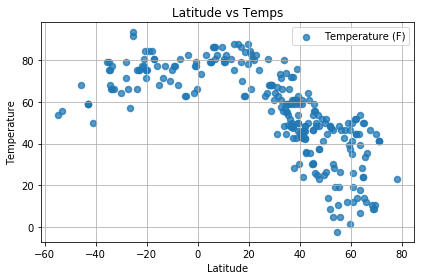

In [13]:
plt.scatter(clean_data_df["Latitude"], clean_data_df["Temperature (F)"], alpha = 0.75, linewidth = 1.5)

#Add title, x axis label and y axis label.
plt.title("Latitude vs Temps")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.tight_layout()
plt.legend(loc="upper right")



#Show plot.
plt.show()

In [14]:
plt.savefig("Temperature.png")

#### Latitude vs. Humidity Plot

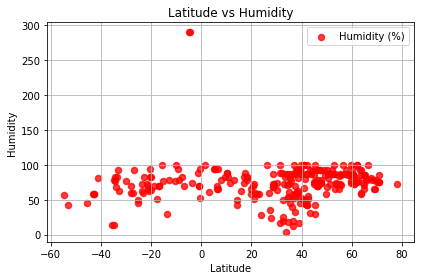

In [15]:
plt.scatter(clean_data_df["Latitude"], clean_data_df["Humidity (%)"], color = "red", alpha = 0.75, linewidth = 1.5)

#Add title, x axis label and y axis label.
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.tight_layout()
plt.legend(loc="best")



#Show plot.
plt.show()

In [16]:
plt.savefig("Humidity.png")

#### Latitude vs. Cloudiness Plot

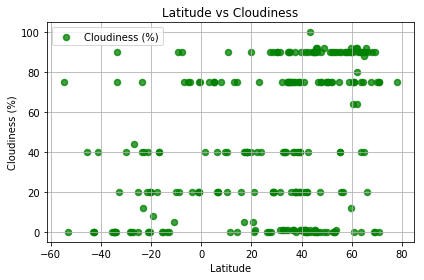

In [17]:
plt.scatter(clean_data_df["Latitude"], clean_data_df["Cloudiness (%)"], color = "green", alpha = 0.75, linewidth = 1.5)

#Add title, x axis label and y axis label.
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.tight_layout()
plt.legend(loc="best")



#Show plot.
plt.show()

In [18]:
plt.savefig("Cloudiness.png")

#### Latitude vs. Wind Speed Plot

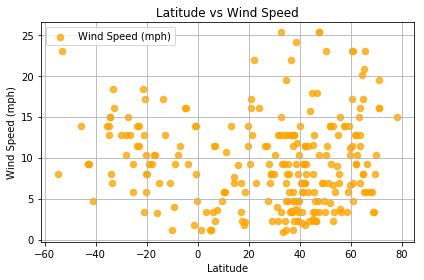

In [19]:
plt.scatter(clean_data_df["Latitude"], clean_data_df['Wind Speed (mph)'], color = "orange", alpha = 0.75, linewidth = 1.5)

#Add title, x axis label and y axis label.
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.tight_layout()
plt.legend(loc="best")



#Show plot.
plt.show()

In [20]:
plt.savefig("Wind Speed")